# Análisis de dataset de autos

El siguiente dataset es la unión de los autos de la marca Audi, Bmw, Hyundi, Merc y Toyota. Este proceso de unión se encuentra en el notebook `Union de datasets.ipynb`. Además, se seguirá las etapas propuestas en el notebook de titanic del laboratorio de la clase de Inteligencia Artificial.

1. Definición de pregunta o problema
2. Adquirir datos
3. Discutir, preparar, limpiar los datos
4. Analizar, identificar patrones y explorar los datos
5. Separar los datos para entrenamiento y prueba 
6. Modelizar, predecir y resolver el problema
7. Visualizar, informar y presentar los pasos de resolución del problema y la solución final.

#### Objetivo de solución:

Crear un sistema de consulta, donde el usuario de acuerdo a las características de un auto pueda predecir el costo de este, se prepará los datos para posteriormente ingresarlos en un modelo en base a redes neuronales.  

## 1. Definición de pregunta

Se ha recolectado una lista de carros usados, los cuáles han sido recopilados en archivos diferentes dependiendo de cada proveedor, el objetivo es brindar una herramienta que permita predecir a cuánto se puede vender un auto comparando con otros en el mercado.

![Image of a car](../img/used_car.jpg)

## 2. Adquirir los datos

Importamos las librerías necesarias para el análisis, como numpy para el uso de arreglos, matplotlib para las gráficos, pandas para el uso de dataframes y seaborn también para gráficos. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
dataframe = pd.read_csv('../data/autos.csv')

## 3. Discutir, preparar y limpiar los datos

Veamos las características del dataset.

In [3]:
print(dataframe.columns.values)

['model' 'year' 'price' 'transmission' 'mileage' 'fuelType' 'tax' 'mpg'
 'engineSize' 'Brand']


Notamos que cuenta en total con 10 variables, 6 numéricas o flotantes y 4 categóricas (objeto). Además, este dataset presenta 19,507 entradas o filas.

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19507 entries, 0 to 19506
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         19507 non-null  object 
 1   year          19507 non-null  int64  
 2   price         19507 non-null  int64  
 3   transmission  19507 non-null  object 
 4   mileage       19507 non-null  int64  
 5   fuelType      19507 non-null  object 
 6   tax           19507 non-null  int64  
 7   mpg           19507 non-null  float64
 8   engineSize    19507 non-null  float64
 9   Brand         19507 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.5+ MB


En todos los dataset se cumple:

* El `year` indica la fecha registrada del vehículo.
* La variable `price` indica el precio del vehículo en euros.
* El `mileage` indica la cantidad de millas en promedio que el vehículo puede recorrer.
* El `tax` indica la cantidad de impuesto que paga el vehículo
* El `mpg` indica las millas que puede recorrer el vehículo con un solo galón
* El `engineSize` indica la cantidad en litros del motor que puede usar

In [5]:
dataframe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


Ahora veamos las descripciones por marca de automovil. Observamos que la marca `Audi` presenta 6822 entradas, `Bmw` 4468, `Toyota` 3647, `Hyundi` 3542 y `Mercedes` 1028.

In [6]:
dataframe[['Brand']].value_counts()

Brand   
Audi        6822
Bmw         4468
Toyota      3647
Hyundi      3542
Mercedes    1028
dtype: int64

El dataset completo presenta 25 modelos de vehículos, los cuáles pertenecen a 5 marcas específicas.

In [7]:
dataframe.describe(include=['O'])

,model,transmission,fuelType,Brand
count,19507,19507,19507,19507
unique,25,4,4,5
top,Yaris,Manual,Petrol,Audi
freq,2122,9815,9844,6822


Existen 4 tipos de transmissión: 'Manual', 'Automatic', 'Semi-Auto' y 'Other'.

In [8]:
modelunique = pd.unique(dataframe['transmission'])
print(modelunique.shape)
modelunique

(4,)


array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

Existen 4 tipos de combustible, 'Petrol', 'Diesel', 'Hybrid' y 'Other.

In [9]:
modelunique = pd.unique(dataframe['fuelType'])
print(modelunique.shape)
modelunique

(4,)


array(['Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

Temporalmente vamos a separar el dataset, dependiendo de la marca para el análisis de sus variables.

In [10]:
DatasetAudi = dataframe[dataframe['Brand'] == 'Audi']
DatasetBmw = dataframe[dataframe['Brand'] == 'Bmw']
DatasetHyundi = dataframe[dataframe['Brand'] == 'Hyundi']
DatasetMerc = dataframe[dataframe['Brand'] == 'Mercedes']
DatasetToyota = dataframe[dataframe['Brand'] == 'Toyota']

### Marca de vehículo `Audi`

Dentro de las características de la marca `Audi` podemos encontrar:
* El año oscila entre 1998 a 2020, y solo el 6% son del año 2020.
* El precio del vehiculo esta entre 1,490 a 60,000 euros, el 1% tiene su precio mayor a 42,000 euros.
* Las millas oscilan entre 5 a 323,000 y la media en esta marca es de 27,257 millas.
* El impuesto que paga el vehículo circula entre 0 a 570 euros, solo el 1% paga más de 235 euros.
* En promedio un vehículo puede recorrer 54 millas por un galón, siendo el mínimo 19.3 y el máximo 188.3.
* El motor puede usar hasta 5.2 litros, siendo el promedio 1.75 litros.

In [11]:
DatasetAudi.describe()
# DatasetAudi.describe([.94])
# DatasetAudi.describe([.99])

,year,price,mileage,tax,mpg,engineSize
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000
mean,2016.878628,19117.472589,27257.501026,107.269862,54.228305,1.754354
std,2.123220,7690.111698,24201.455062,63.877972,12.665225,0.438000
min,1998.000000,1490.000000,5.000000,0.000000,19.300000,0.000000
25%,2016.000000,13486.250000,7040.250000,30.000000,45.600000,1.400000
50%,2017.000000,17947.500000,22228.500000,145.000000,53.300000,2.000000
75%,2019.000000,23495.000000,38685.000000,145.000000,61.400000,2.000000
max,2020.000000,60000.000000,323000.000000,570.000000,188.300000,5.200000


El dataset presenta solo cinco modelos de vehículos 'A1', 'A6', 'A4', 'A3' y 'Q3'.

In [12]:
modelunique = pd.unique(DatasetAudi['model'])
print(modelunique.shape)
modelunique

(5,)


array(['A1', 'A6', 'A4', 'A3', 'Q3'], dtype=object)

### Marca de vehículo `Bmw`

Dentro de las características de la marca `Bmw`, podemos encontrar:
* El año oscila entre 1996 a 2020, y solo el 6% son del año 2020.
* El precio del vehiculo esta entre 1,500 a 123,456 euros, el 1% tiene su precio mayor a 46,631 euros.
* Las millas oscilan entre 5 a 178,987 y la media en esta marca es de 25,588 millas.
* El impuesto que paga el vehículo circula entre 0 a 565 euros, solo el 1% paga más de 300 euros.
* En promedio un vehículo puede recorrer 57 millas por un galón, siendo el mínimo 22 y el máximo 565.
* El motor puede usar hasta 6.6 litros, siendo el promedio 2.017 litros.

In [13]:
DatasetBmw.describe()
# dataframe[dataframe['Brand'] == 'Bmw'].describe([.99])

,year,price,mileage,tax,mpg,engineSize
count,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000
mean,2016.997986,19138.673008,25588.464637,121.223142,57.675582,2.017413
std,2.228244,8142.553873,24372.575930,62.860406,17.440428,0.529253
min,1996.000000,1500.000000,5.000000,0.000000,22.100000,0.000000
25%,2016.000000,13000.000000,6096.000000,125.000000,48.700000,1.500000
50%,2017.000000,17854.000000,19584.500000,145.000000,54.300000,2.000000
75%,2019.000000,23450.000000,37507.250000,145.000000,65.700000,2.000000
max,2020.000000,123456.000000,178987.000000,565.000000,156.900000,6.600000


El dataset presenta solo cinco modelos de vehículos '5 Series', '6 Series', '1 Series', '7 Series' y '2 Series'.

In [14]:
modelunique = pd.unique(DatasetBmw['model'])
print(modelunique.shape)
modelunique

(5,)


array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series'],
      dtype=object)

### Marca de vehículo `Toyota`

Dentro de las características de la marca `Toyota`, podemos encontrar:
* El año oscila entre 1999 a 2020, y solo el 2% son del año 2020.
* Antes del año 2000 solo hay menos del 0.1% de carros.
* El precio del vehiculo esta entre 899 a 37,440 euros, el 1% tiene su precio mayor a 29,901 euros.
* Las millas oscilan entre 2 a 150,000 y la media en esta marca es de 24,471 millas.
* El impuesto que paga el vehículo circula entre 0 a 330 euros, solo el 1% paga más de 260 euros y es menor al precio maximo de tax de la marca Bmw.
* En promedio un vehículo puede recorrer 61 millas por un galón, siendo el mínimo 30 y el máximo 86.
* El motor puede usar hasta 2.5 litros, siendo el promedio 1.610 litros.

In [15]:
DatasetToyota.describe()
#DatasetToyota.describe([.99])
#DatasetToyota.describe([.001])

,year,price,mileage,tax,mpg,engineSize
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,2016.555525,12869.348506,24471.850836,88.209487,61.496381,1.610063
std,2.334395,5110.881286,19398.308769,70.549539,12.981112,0.340533
min,1999.000000,899.000000,2.000000,0.000000,30.400000,0.000000
25%,2016.000000,9795.000000,10000.000000,20.000000,52.300000,1.400000
50%,2017.000000,11895.000000,20069.000000,135.000000,58.900000,1.500000
75%,2018.000000,14698.000000,33395.500000,145.000000,72.400000,1.800000
max,2020.000000,37440.000000,150000.000000,330.000000,86.000000,2.500000


El dataset presenta solo cinco modelos de vehículos 'GT86', 'Corolla', 'RAV4', 'Yaris' y 'Auris'.

In [16]:
modelunique = pd.unique(DatasetToyota['model'])
print(modelunique.shape)
modelunique

(5,)


array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris'], dtype=object)

### Marca de vehículo `Hyundi`

Dentro de las características de la marca `Hyundi`, podemos encontrar:
* El año oscila entre 2007 a 2020, y solo el 4% son del año 2020.
* El precio del vehiculo esta entre 1,395 a 92,000 euros, el 1% tiene su precio mayor a 80,274 euros.
* Las millas oscilan entre 1 a 305 y la media en esta marca es de 22,178 millas.
* El impuesto que paga el vehículo circula entre 0 a 305 euros, solo el 1% paga más de 222 euros.
* En promedio un vehículo puede recorrer 54 millas por un galón, siendo el mínimo 34 y el máximo 78.
* El motor puede usar hasta 2.2 litros, siendo el promedio 1.387 litros.

In [17]:
DatasetHyundi.describe()
#DatasetHyundi.describe([.96,.97,.99])

,year,price,mileage,tax,mpg,engineSize
count,3542.000000,3542.000000,3542.000000,3542.000000,3542.000000,3542.000000
mean,2016.970356,11460.088368,22178.209204,112.656691,54.205703,1.386618
std,1.848993,5102.150041,17641.624728,58.565166,9.951838,0.342238
min,2007.000000,1395.000000,1.000000,0.000000,34.000000,0.000000
25%,2016.000000,7665.500000,9207.500000,30.000000,47.100000,1.200000
50%,2017.000000,10280.000000,18275.000000,145.000000,57.600000,1.400000
75%,2018.000000,14488.750000,31347.500000,145.000000,60.100000,1.600000
max,2020.000000,92000.000000,138000.000000,305.000000,78.400000,2.200000


El dataset presenta solo cinco modelos de vehículos 'I20', 'Tucson', 'I10', 'IX35' y 'I30'.

In [18]:
modelunique = pd.unique(DatasetHyundi['model'])
print(modelunique.shape)
modelunique

(5,)


array(['I20', 'Tucson', 'I10', 'IX35', 'I30'], dtype=object)

### Marca de vehículo `Mercedes`

Dentro de las características de la marca `Mercedes`, podemos encontrar:
* El año oscila entre 1997 a 2020, y solo el 6% son del año 2020.
* El precio del vehiculo esta entre 1,490 a 159,999 euros, el 1% tiene su precio mayor a 103,887 euros.
* Las millas oscilan entre 9 a 122,000 y la media en esta marca es de 20,432 millas.
* El impuesto que paga el vehículo circula entre 0 a 580 euros, solo el 1% paga más de 570 euros.
* En promedio un vehículo puede recorrer 43 millas por un galón, siendo el mínimo 11 y el máximo 122.
* El motor puede usar hasta 6.2 litros, siendo el promedio 2.778 litros.

In [19]:
DatasetMerc.describe()
#DatasetMerc.describe([.95,.96,.99])

,year,price,mileage,tax,mpg,engineSize
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,2016.653696,36994.132296,20432.758755,175.544747,43.707685,2.777626
std,3.576772,19979.836258,19784.435673,91.615890,12.737181,0.835230
min,1997.000000,1490.000000,9.000000,0.000000,11.000000,0.000000
25%,2016.000000,24987.750000,4988.500000,145.000000,34.000000,2.100000
50%,2017.000000,31990.000000,15094.000000,145.000000,42.800000,3.000000
75%,2019.000000,49484.750000,30135.750000,200.000000,47.900000,3.000000
max,2020.000000,159999.000000,122000.000000,580.000000,122.900000,6.200000


El dataset presenta solo cinco modelos de vehículos 'SLK', 'S Class', 'SL CLASS', 'G Class' y 'GLE Class'.

In [20]:
modelunique = pd.unique(DatasetMerc['model'])
print(modelunique.shape)
modelunique

(5,)


array(['SLK', 'S Class', 'SL CLASS', 'G Class', 'GLE Class'], dtype=object)

### Preparación de los datos

#### Variables categóricas

Hasta ahora no hemos modificado el dataframe, entonces, en esta sección vamos a setear de categóricos a números. Empezaremos con la marca de vehículo.

In [21]:
marcas = {'Audi':0, 'Bmw':1, 'Hyundi':2, 'Mercedes':3, 'Toyota':4}
marcasI = { value:key for key, value in marcas.items()}

dataframe['Brand'] = dataframe['Brand'].map(marcas).astype(int)

In [22]:
# comprobamos
modelunique = pd.unique(dataframe['Brand'])
print(modelunique.shape)
modelunique

(5,)


array([0, 1, 2, 3, 4])

Ahora, vamos a transformar la variable `transmission` a numéro.

In [23]:
transmission = {'Manual':0, 'Automatic':1, 'Semi-Auto':2, 'Other':3}
transmissionI = { value:key for key, value in transmission.items()}

dataframe['transmission'] = dataframe['transmission'].map(transmission).astype(int) 

In [24]:
# comprobamos
modelunique = pd.unique(dataframe['transmission'])
print(modelunique.shape)
modelunique

(4,)


array([0, 1, 2, 3])

Hacemos lo mismo para la variable `fuelType`.

In [25]:
fuelType = {'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Other':3}

dataframe['fuelType'] = dataframe['fuelType'].map(fuelType).astype(int) 

In [26]:
# comprobamos
modelunique = pd.unique(dataframe['fuelType'])
print(modelunique.shape)
modelunique

(4,)


array([0, 1, 2, 3])

también vamos a transformar la variable `model` a numérico, esto se realizará con las 25 marcas disponibles. 
* marca Audi: 'A1', 'A6', 'A4', 'A3' y 'Q3'.
* marca Bmw: '5 Series', '6 Series', '1 Series', '7 Series' y '2 Series'.
* marca Toyota: 'GT86', 'Corolla', 'RAV4', 'Yaris' y 'Auris'.
* marca Hyundi: 'I20', 'Tucson', 'I10', 'IX35' y 'I30'.
* marca Mercedes: 'SLK', 'S Class', 'SL CLASS', 'G Class' y 'GLE Class'.

In [27]:
model = {'A1':0, 'A6':1, 'A4':2, 'A3':3, 'Q3':4,\
         '5 Series':5, '6 Series':6, '1 Series':7, '7 Series':8, '2 Series':9, \
         'GT86':10, 'Corolla':11, 'RAV4':12, 'Yaris':13, 'Auris':14, \
         'I20':15, 'Tucson':16, 'I10':17, 'IX35':18, 'I30':19, \
         'SLK':20, 'S Class':21, 'SL CLASS':22, 'G Class':23, 'GLE Class':24}    

dataframe['model'] = dataframe['model'].map(model).astype(int)

In [28]:
# comprobamos
modelunique = pd.unique(dataframe['model'])
print(modelunique.shape)
modelunique

(25,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 10, 11, 12, 13, 14])

#### Variables enteras con rango

Ahora, vamos a crear rangos para las variables numéricas como por ejemplo `mileage`, ya que creemos que pude influir en el modelo, además posee 13963 valores únicos.

In [29]:
#verificar los valores únicos
modelunique = pd.unique(dataframe['mileage'])
print(modelunique.shape)

(13963,)


In [30]:
#dividir en 10 grupos 
dataframe['mileageRango'] = pd.qcut(dataframe['mileage'], 10)

#mostrar los grupos
pd.DataFrame(dataframe[['mileageRango']].value_counts()).sort_values(by='mileageRango', ascending=True)

,0
mileageRango,
"(0.999, 2928.0]",1953
"(2928.0, 6000.0]",2059
"(6000.0, 9857.0]",1841
"(9857.0, 14772.0]",1950
"(14772.0, 20022.0]",1951
"(20022.0, 25635.8]",1950
"(25635.8, 31544.4]",1951
"(31544.4, 40000.0]",1961
"(40000.0, 54591.8]",1940


In [31]:
#setear los valores según el rango
dataframe.loc[ dataframe['mileage'] <= 2928.0, 'mileage'] = 0
dataframe.loc[ (dataframe['mileage'] > 2928.0) & (dataframe['mileage'] <= 6000.0), 'mileage'] = 1
dataframe.loc[ (dataframe['mileage'] > 6000.0) & (dataframe['mileage'] <= 9857.0), 'mileage'] = 2
dataframe.loc[ (dataframe['mileage'] > 9857.0) & (dataframe['mileage'] <= 14772.0), 'mileage'] = 3
dataframe.loc[ (dataframe['mileage'] > 14772.0) & (dataframe['mileage'] <= 20022.0), 'mileage'] = 4
dataframe.loc[ (dataframe['mileage'] > 20022.0) & (dataframe['mileage'] <= 25635.8), 'mileage'] = 5
dataframe.loc[ (dataframe['mileage'] > 25635.8) & (dataframe['mileage'] <= 31544.4), 'mileage'] = 6
dataframe.loc[ (dataframe['mileage'] > 31544.4) & (dataframe['mileage'] <= 40000.0), 'mileage'] = 7
dataframe.loc[ (dataframe['mileage'] > 40000.0) & (dataframe['mileage'] <= 54591.8), 'mileage'] = 8
dataframe.loc[ dataframe['mileage'] > 54591.8, 'mileage'] = 9

#Eliminamos la variable de 'mileageRango' del dataframe
dataframe = dataframe.drop(['mileageRango'], axis=1)

Realizamos el mismo procedimiento para la variable `tax`.

In [32]:
#verificar los valores únicos
modelunique = pd.unique(dataframe['tax'])
print(modelunique.shape)

(38,)


In [33]:
#dividir en 3 grupos 
dataframe['taxRange'] = pd.qcut(dataframe['tax'], 3)

#mostrar los grupos
pd.DataFrame(dataframe[['taxRange']].value_counts()).sort_values(by='taxRange', ascending=True)

,0
taxRange,
"(-0.001, 125.0]",7081
"(125.0, 145.0]",8907
"(145.0, 580.0]",3519


In [34]:
#setear los valores según el rango
dataframe.loc[ dataframe['tax'] <= 125.0, 'tax'] = 0
dataframe.loc[ (dataframe['tax'] > 125.0) & (dataframe['tax'] <= 145.0), 'tax'] = 1
dataframe.loc[ dataframe['tax'] > 145.0, 'tax'] = 2

#Eliminamos la variable de 'mileageRango' del dataframe
dataframe = dataframe.drop(['taxRange'], axis=1)

Realizamos lo mismo para la variable `mpg`, el cuál posee 125 valores únicos.

In [35]:
#verificar los valores únicos
modelunique = pd.unique(dataframe['mpg'])
print(modelunique.shape)

(125,)


In [36]:
#dividir en 3 grupos 
dataframe['mpgRange'] = pd.qcut(dataframe['mpg'], 10)

#mostrar los grupos
pd.DataFrame(dataframe[['mpgRange']].value_counts()).sort_values(by='mpgRange', ascending=True)

,0
mpgRange,
"(10.999, 39.2]",2000
"(39.2, 44.8]",2060
"(44.8, 47.9]",1804
"(47.9, 51.4]",2054
"(51.4, 55.4]",2081
"(55.4, 58.0]",1870
"(58.0, 60.1]",1848
"(60.1, 65.7]",2088
"(65.7, 72.4]",1946


In [37]:
#setear los valores según el rango
dataframe.loc[ dataframe['mpg'] <= 39.2, 'mpg'] = 0
dataframe.loc[ (dataframe['mpg'] > 39.2) & (dataframe['mpg'] <= 44.8), 'mpg'] = 1
dataframe.loc[ (dataframe['mpg'] > 44.8) & (dataframe['mpg'] <= 47.9), 'mpg'] = 2
dataframe.loc[ (dataframe['mpg'] > 47.9) & (dataframe['mpg'] <= 51.4), 'mpg'] = 3
dataframe.loc[ (dataframe['mpg'] > 51.4) & (dataframe['mpg'] <= 55.4), 'mpg'] = 4
dataframe.loc[ (dataframe['mpg'] > 55.4) & (dataframe['mpg'] <= 58.0), 'mpg'] = 5
dataframe.loc[ (dataframe['mpg'] > 58.0) & (dataframe['mpg'] <= 60.1), 'mpg'] = 6
dataframe.loc[ (dataframe['mpg'] > 60.1) & (dataframe['mpg'] <= 65.7), 'mpg'] = 7
dataframe.loc[ (dataframe['mpg'] > 65.7) & (dataframe['mpg'] <= 72.4), 'mpg'] = 8
dataframe.loc[ dataframe['mpg'] > 72.4, 'mpg'] = 9

#Eliminamos la variable de 'mileageRango' del dataframe
dataframe = dataframe.drop(['mpgRange'], axis=1)

Realizamos lo mismo para la variable `engineSize`, el cuál posee 33 valores únicos.

In [38]:
#verificar los valores únicos
modelunique = pd.unique(dataframe['engineSize'])
print(modelunique.shape)

(33,)


In [39]:
#dividir en 3 grupos 
dataframe['engineSizeRange'] = pd.qcut(dataframe['engineSize'], 4)

#mostrar los grupos
pd.DataFrame(dataframe[['engineSizeRange']].value_counts()).sort_values(by='engineSizeRange', ascending=True)

,0
engineSizeRange,
"(-0.001, 1.5]",7995
"(1.5, 1.7]",2341
"(1.7, 2.0]",7007
"(2.0, 6.6]",2164


In [40]:
#setear los valores según el rango
dataframe.loc[ dataframe['engineSize'] <= 1.5, 'engineSize'] = 0
dataframe.loc[ (dataframe['engineSize'] > 1.5) & (dataframe['engineSize'] <= 1.7), 'engineSize'] = 1
dataframe.loc[ (dataframe['engineSize'] > 1.7) & (dataframe['engineSize'] <= 2.0), 'engineSize'] = 2
dataframe.loc[ dataframe['engineSize'] > 2.0, 'engineSize'] = 3

#Eliminamos la variable de 'mileageRango' del dataframe
dataframe = dataframe.drop(['engineSizeRange'], axis=1)

In [41]:
dataframe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,0,2017,12500,0,4,0,2,4.0,0.0,0
1,1,2016,16500,1,7,1,0,7.0,2.0,0
2,0,2016,11000,0,6,0,0,4.0,0.0,0
3,2,2017,16800,1,6,1,1,8.0,2.0,0
4,3,2019,17300,0,0,0,1,3.0,0.0,0


In [42]:
#verificar los valores únicos
modelunique = pd.unique(dataframe['price'])
print(modelunique.shape)

(4916,)


## 4. Analizar, identificar patrones y explorar los datos

A continuación vamos a realizar unos cuadros comparativos y unas visualizaciones para identificar patrones. En la tabla sobre el `price` y `Brand` podemos observar que la marca influye en el precio, 'Mercedes', 'Bmw', 'Audi', 'Toyota' y 'Hyundi' se encuentran en orden descendiente.

,Brand,price
3,Mercedes,36994.132296
1,Bmw,19138.673008
0,Audi,19117.472589
4,Toyota,12869.348506
2,Hyundi,11460.088368


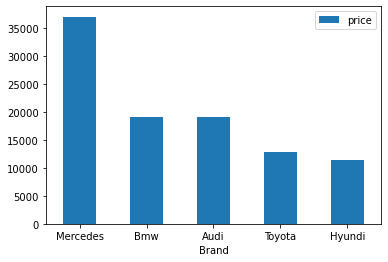

In [43]:
aux = dataframe[['Brand', 'price']].groupby('Brand', as_index=False).mean().sort_values(by='price', ascending=False)
aux['Brand'] = aux['Brand'].map(marcasI)
aux.plot.bar(x='Brand', y='price', rot=0)
aux

En la variable `year` notamos que aproximadamente en el año 2010 para adelante guarda una relación de más actual sea el vehiculo, más es su precio, y antes del 2010 no guarda una relación sino que varía, suponemos que esto se debe a las características del vehículo.

,year,price
24,2020,29540.166474
23,2019,25184.299873
22,2018,17131.820821
21,2017,15642.521294
20,2016,14422.670680
19,2015,12555.978723
18,2014,10652.368870
17,2013,9153.621795
16,2012,8579.187879
15,2011,9258.223881


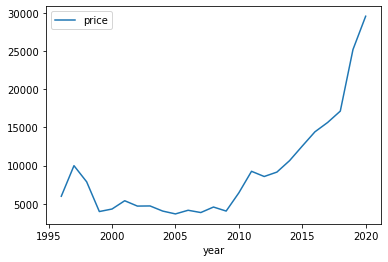

In [44]:
aux = dataframe[['year', 'price']].groupby('year', as_index=False).mean().sort_values(by='year', ascending=False)
aux.plot.line(x='year', y='price')
aux

Luego, en el tipo de transmissión, 'Semi-Auto' es el de mayor precio, luego sigue el 'Automatic', 'Other' y por último 'Manual'.

<AxesSubplot:xlabel='transmission'>

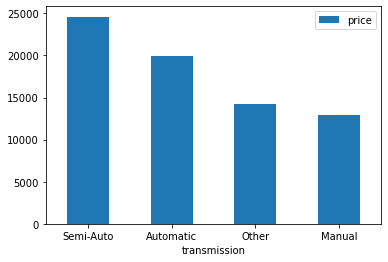

In [45]:
aux = dataframe[['transmission', 'price']].groupby('transmission', as_index=False).mean().sort_values(by='price', ascending=False)
aux['transmission'] = aux['transmission'].map(transmissionI)
aux.plot.bar(x='transmission',y='price', rot='0')

De los autos que tienen `mileage` bajo guardan un relacion con su precio de que es mayor, por otro lado cuando van aumentando su `mileage` su precio va disminuyendo.

,mileage,price
0,"(0.999,2928]",27084.253968
1,"(2928,6000]",25169.824672
2,"(6000,9857]",21803.537208
3,"(9857,14772]",17667.230769
4,"(14772,20022]",16111.247565
5,"(20022,25635]",15416.192308
6,"(25635,31544]",14588.169657
7,"(31544,40000]",14170.449261
8,"(40000,54591]",12747.852062
9,"(54591,323000]",10097.515633


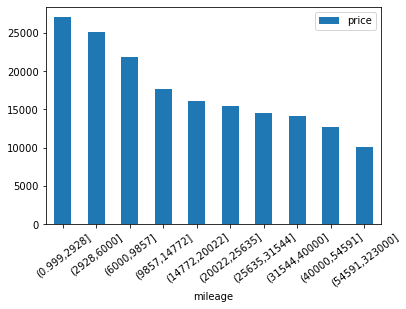

In [46]:
aux = dataframe[['mileage', 'price']].groupby('mileage', as_index=False).mean().sort_values(by='price', ascending=False)
diccionario={0: "(0.999,2928]",1:"(2928,6000]",2:"(6000,9857]", 3:"(9857,14772]", 4:"(14772,20022]"
             ,5:"(20022,25635]",6:"(25635,31544]",7:"(31544,40000]",8:"(40000,54591]",9:"(54591,323000]"}
aux['mileage'] = aux['mileage'].map(diccionario)
aux.plot.bar(x='mileage',y='price',rot='37')
aux

En promedio el mayor precio de `fueltype` es Diesel siguiendoles Hybrid, otros, Petrol.

,fuelType,price
1,Diesel,18779.157882
2,Hybrid,17173.319976
3,Other,16596.260870
0,Petrol,16533.855039


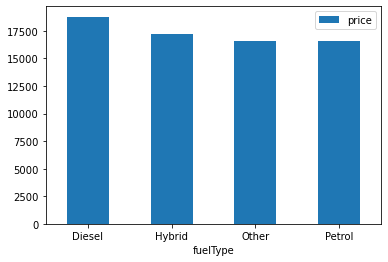

In [47]:
aux = dataframe[['fuelType', 'price']].groupby('fuelType', as_index=False).mean().sort_values(by='price', ascending=False)
fuelTypeI = { value:key for key, value in fuelType.items()}
aux['fuelType'] = aux['fuelType'].map(fuelTypeI)
aux.plot.bar(x='fuelType',y='price', rot='0')
aux

En promedio los vehiculos que pagan `tax` entre 0 hasta 125 euros tienen un precio de 12,037 euros, luegos los vehiculos de 125 hasta 145 tienen un precio de 21,589 euros y finalmente los vehiculos de 145 hasta 580 tienen un precio de 18,172 euros.

,tax,price
0,"(0,125]",12037.440192
1,"(125,145]",21589.874593
2,"(145,580]",18172.485649


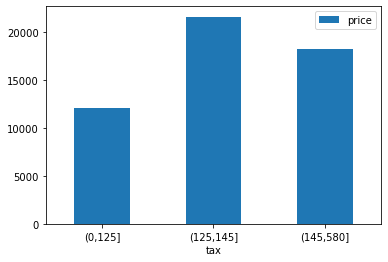

In [48]:
aux = dataframe[['tax', 'price']].groupby('tax', as_index=False).mean().sort_values(by='tax', ascending=True)
diccionario={0:"(0,125]",1:"(125,145]",2:"(145,580]"}
aux['tax'] = aux['tax'].map(diccionario)
aux.plot.bar(x='tax',y='price', rot='0')
aux

El `mpg`presenta una correlacion donde va aumentando su precio de acuerdo a las millas por galon.

,mpg,price
9,"(72,188]",12989.110478
8,"(65,72]",14012.498458
7,"(60,65]",15020.652778
6,"(58,60]",12269.459416
5,"(55,58]",12525.249733
4,"(51,55]",16020.000000
3,"(47,51]",19988.066212
2,"(44,47]",18434.675721
1,"(39,44]",22833.200971
0,"(10,39]",29632.473000


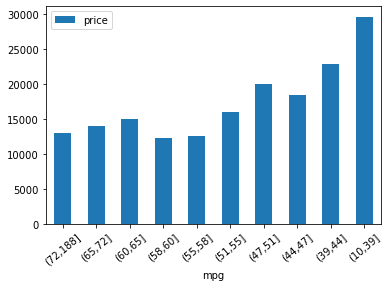

In [49]:
aux = dataframe[['mpg', 'price']].groupby('mpg', as_index=False).mean().sort_values(by='mpg', ascending=False)
diccionario={0:"(10,39]",1:"(39,44]",2:"(44,47]",3:"(47,51]",4:"(51,55]",5:"(55,58]",6:"(58,60]",7:"(60,65]"
             ,8:"(65,72]",9:"(72,188]"}
aux['mpg'] = aux['mpg'].map(diccionario)
aux.plot.bar(x='mpg',y='price', rot='40')
aux

Podemos inferir que si la medida del `engineSize` aumenta, entonces su precio tambien.

,engineSize,price
0,"(0,1.5]",13249.567980
1,"(1.5,1.7]",13832.362238
2,"(1.7,2]",19701.678893
3,"(2,6.6]",30095.001848


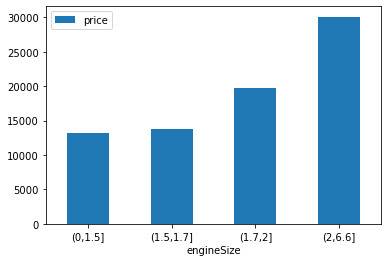

In [50]:
aux = dataframe[['engineSize', 'price']].groupby('engineSize', as_index=False).mean().sort_values(by='engineSize', ascending=True)
diccionario={0:"(0,1.5]",1:"(1.5,1.7]",2:"(1.7,2]",3:"(2,6.6]"}
aux['engineSize'] = aux['engineSize'].map(diccionario)
aux.plot.bar(x='engineSize',y='price', rot='0')
aux

Vamor a crear un mapa de correlación. Luego analizaremos el puntaje de todas las variables contra la variable price.

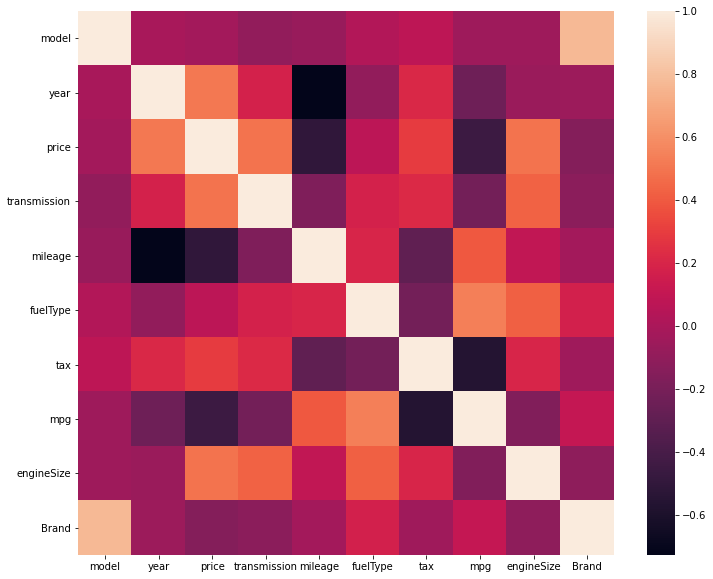

In [51]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(dataframe.corr())

## 5. Separar los datos para entrenamiento y prueba

In [52]:
label = dataframe['price']
data = dataframe.drop('price', axis=1)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.33)

## 6. Modelizar, predecir y resolver el problema

In [59]:
# Para machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#import tensorflow as tf
from tensorflow.keras.models import Sequentia
from tensorflow.keras.layers import Dens, Dropout
from tensorflow.keras.callbacks import EarlyStoppin

from sklearn.metrics import mean_squared_error as MSE

AlreadyExistsError: Another metric with the same name already exists.

#### Algoritmo de Redes Neuronales Artificiales (RNA)

In [58]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

AlreadyExistsError: Another metric with the same name already exists.

En la primera evaluación, `year`, `model`, `transmission` y `Brand`.

In [ ]:
data_1 = dataframe[['year', 'model', 'transmission', 'Brand']]

X_train, X_test_1, Y_train, Y_test = train_test_split(data_1, label, test_size=0.33)

In [ ]:
model_1 = Sequential()

model_1.add(Dense(9, activation='relu'))
model_1.add(Dense(255))
model_1.add(Dense(255))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [ ]:
model_1.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/300
409/409 [==============================] - 2s 5ms/step - loss: 103974568.0000 - val_loss: 101580424.0000
Epoch 2/300
409/409 [==============================] - 1s 4ms/step - loss: 98404576.0000 - val_loss: 101002040.0000
Epoch 3/300
409/409 [==============================] - 1s 4ms/step - loss: 97997184.0000 - val_loss: 102166240.0000
Epoch 4/300
409/409 [==============================] - 1s 4ms/step - loss: 98314880.0000 - val_loss: 100203416.0000
Epoch 5/300
409/409 [==============================] - 1s 3ms/step - loss: 97526376.0000 - val_loss: 101193528.0000
Epoch 6/300
409/409 [==============================] - 2s 4ms/step - loss: 97116296.0000 - val_loss: 99101128.0000
Epoch 7/300
409/409 [==============================] - 1s 3ms/step - loss: 96215784.0000 - val_loss: 97915904.0000
Epoch 8/300
409/409 [==============================] - 1s 4ms/step - loss: 94511896.0000 - val_loss: 95218400.0000
Epoch 9/300
409/409 [==============================] - 1s 3ms/step - loss:

409/409 [==============================] - 1s 3ms/step - loss: 72029160.0000 - val_loss: 73226976.0000
Epoch 72/300
409/409 [==============================] - 1s 4ms/step - loss: 72409144.0000 - val_loss: 78866192.0000
Epoch 73/300
409/409 [==============================] - 1s 4ms/step - loss: 72434656.0000 - val_loss: 73156312.0000
Epoch 74/300
409/409 [==============================] - 1s 4ms/step - loss: 72965688.0000 - val_loss: 73590656.0000
Epoch 75/300
409/409 [==============================] - 2s 4ms/step - loss: 73211984.0000 - val_loss: 73281672.0000
Epoch 76/300
409/409 [==============================] - 1s 4ms/step - loss: 72665488.0000 - val_loss: 73727936.0000
Epoch 77/300
409/409 [==============================] - 1s 4ms/step - loss: 72445008.0000 - val_loss: 73362384.0000
Epoch 78/300
409/409 [==============================] - 1s 3ms/step - loss: 72942016.0000 - val_loss: 79265168.0000
Epoch 79/300
409/409 [==============================] - 1s 4ms/step - loss: 72492960.

En la segunda evaluación, `year`, `transmission`, `engineSize`.

In [ ]:
data_2 = dataframe[['year', 'transmission', 'engineSize']]

X_train, X_test_2, Y_train, Y_test = train_test_split(data_2, label, test_size=0.33)

In [ ]:
model_2 = Sequential()

model_2.add(Dense(9, activation='relu'))
model_2.add(Dense(255))
model_2.add(Dense(255))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mse')

In [ ]:
model_2.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

409/409 [==============================] - 2s 4ms/step - loss: 108100680.0000 - val_loss: 97186064.0000
Epoch 2/300
409/409 [==============================] - 2s 4ms/step - loss: 99521760.0000 - val_loss: 97059152.0000
Epoch 3/300
409/409 [==============================] - 2s 4ms/step - loss: 99195632.0000 - val_loss: 96724328.0000
Epoch 4/300
409/409 [==============================] - 1s 4ms/step - loss: 98683456.0000 - val_loss: 96458576.0000
Epoch 5/300
409/409 [==========================

409/409 [==============================] - 1s 3ms/step - loss: 64341148.0000 - val_loss: 64960312.0000
Epoch 66/300
409/409 [==============================] - 1s 3ms/step - loss: 63676616.0000 - val_loss: 64836236.0000
Epoch 67/300
409/409 [==============================] - 1s 3ms/step - loss: 63727112.0000 - val_loss: 64909172.0000
Epoch 68/300
409/409 [==============================] - 1s 3ms/step - loss: 63755444.0000 - val_loss: 66461960.0000
Epoch 69/300
409/409 [==============================] - 1s 3ms/step - loss: 63555724.0000 - val_loss: 66085848.0000
Epoch 70/300
409/409 [==============================] - 2s 4ms/step - loss: 63353524.0000 - val_loss: 67360848.0000
Epoch 71/300
409/409 [==============================] - 1s 3ms/step - loss: 63603984.0000 - val_loss: 64881904.0000
Epoch 72/300
409/409 [==============================] - 1s 3ms/step - loss: 63807668.0000 - val_loss: 64672676.0000
Epoch 00072: early stopping


En la última evaluación, definimos todas las variables.

In [ ]:
X_train, X_test_3, Y_train, Y_test = train_test_split(dataframe, label, test_size=0.33)

In [ ]:
model_3 = Sequential()

model_3.add(Dense(9, activation='relu'))
model_3.add(Dense(255))
model_3.add(Dense(255))
model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mse')

In [ ]:
model_3.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

409/409 [==============================] - 2s 4ms/step - loss: 2559718.5000 - val_loss: 19.3393
Epoch 2/300
409/409 [==============================] - 1s 4ms/step - loss: 19.9091 - val_loss: 21.4501
Epoch 3/300
409/409 [==============================] - 1s 3ms/step - loss: 15.5942 - val_loss: 11.8224
Epoch 4/300
409/409 [==============================] - 1s 3ms/step - loss: 12.3236 - val_loss: 9.6432
Epoch 5/300
409/409 [==============================] - 1s 4ms/step - loss: 12.3613 - val_los

In [ ]:
prediction1 = model_1.predict(X_test_1)
print("Prediccion variables: 'year', 'model', 'transmission', 'Brand': ", np.sqrt(MSE(Y_test, prediction1)))

prediction2 = model_2.predict(X_test_2)
print("Prediccion variables: 'year', , 'transmission', 'Brand': ", np.sqrt(MSE(Y_test, prediction2)))
np.sqrt(MSE(Y_test, prediction2))

prediction3 = model_3.predict(X_test_3)
print("Prediccion con todas las variables: ", np.sqrt(MSE(Y_test, prediction3)))

Prediccion variables: 'year', 'model', 'transmission', 'Brand':  10663.668969635091
Prediccion variables: 'year', , 'transmission', 'Brand':  11362.125890227957
Prediccion con todas las variables:  5.659872842108367



prediction1 = model_1.predict(X_test)
np.sqrt(MSE(Y_test, prediction))
## 7. Visualizar, informar y presentar los pasos de resolución del problema y la solución final.

Exportar el modelo en formato h5

In [ ]:
model_3.save('autos.h5')

Luego, podemos ver que elementos existen en la presente carpeta

In [ ]:
!ls

AnÃ¡lisis y modelo para dataset de autos_modificado.ipynb
BMW example - car regression.ipynb
Modelo del dataset de autos.ipynb
Union de datasets_modificado.ipynb
autod.h5
autos.h5
carpeta_out
preprocesamiento y union de datasets.ipynb
prototipo_intefaz.ipynb


Luego antes de usar el método `tensorflowjs_converter` es necesario instalar la librería `tensorflow.js`, esto se puede realizar
con el siguiente comando.

In [ ]:
!pip install tensorflowjs

^C


Luego, creamos una carpeta donde guardaremos los archivos resultantes.

In [ ]:
!mkdir carpeta_out

A subdirectory or file carpeta_out already exists.


Realizamos la exportación a la carpeta `carpeta_out`

In [ ]:
!tensorflowjs_converter --input_format keras autos.h5 carpeta_out

Ingresamos a la carpeta y luego verificamos los archivos de salida ("bin", "json", "h5").

In [ ]:
!ls carpeta_out

autod.h5
group1-shard1of1.bin
model.json
